# Create a presentation on the following econometric methods, including how and when you would use it: OLS, 2SLS, and Logistic regression. Use any appropriate publicly available dataset, choose a problem statement and Implement OLS, Logistic and 2SLS models.


Here we are taking a publicly famous dataset titanic  and applying Logistic Regression ,Ordinary Least Regression , Two Stage Least Square method choosing appropriate features for each method appropriately. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#pd.set_option("display.max_columns",None)
#pd.set_option("display.width",500)

In [2]:
df=pd.read_csv("Titanic-Dataset.csv")
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Variable Description

PassengerId: unique id number to each passenger

Survived: passenger survive(1) or died(0)

Pclass: passenger class

Name: name

Sex: gender of passenger

Age: age of passenger

SibSp: number of siblings/spouses

Parch: number of parents/children

Ticket: ticket number

Fare: amount of money spent on ticket

Cabin: cabin category

Embarked: port where passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton)

In [3]:
def check_df(df):
  print("**********head********************")
  print(df.head())
  print("**********tail********************")
  print(df.tail())
  print("**********info********************")
  print(df.info())
  print("**********columns*****************")
  print(df.columns)
  print("**********null_values*************")
  print(df.isnull().values.any())  
  print("**********shape*******************")
  print(df.shape)
  print("**********describe****************")
  print(df.describe().T)
  print("**********null_sum****************")
  print(df.isnull().sum())
  print("***********Corr*******************")
  print(df.corr())
  print("***********dtypes*****************")
  print(df.dtypes)
check_df(df)

**********head********************
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            

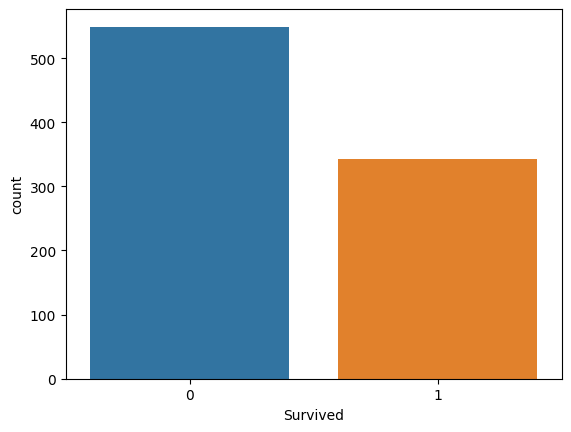

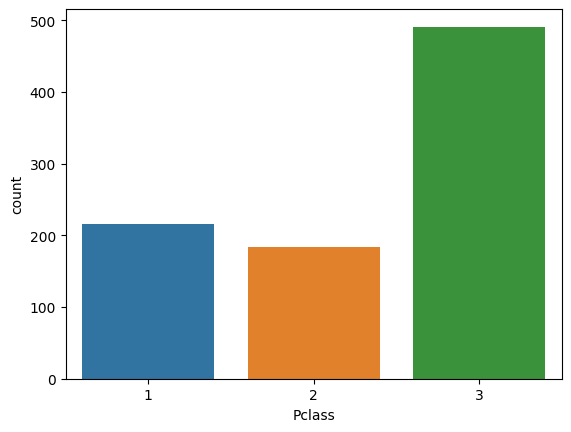

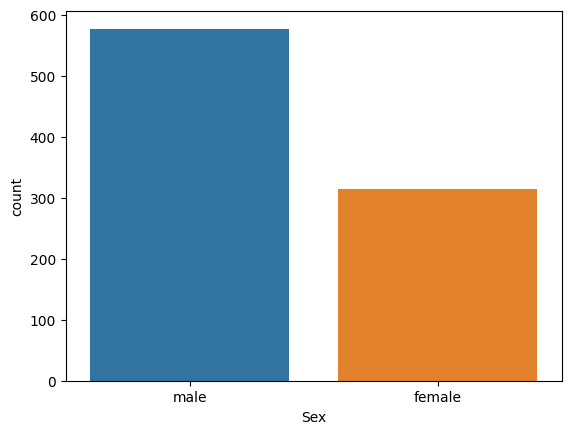

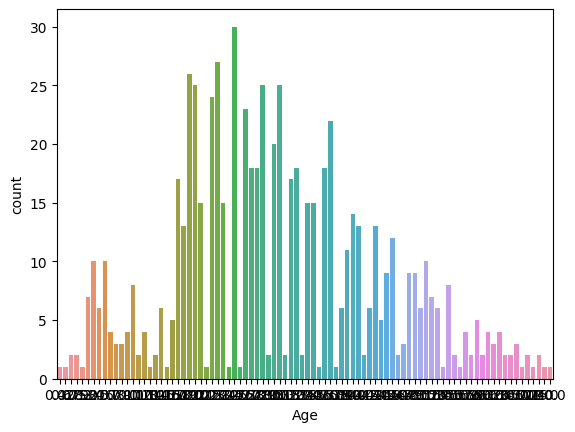

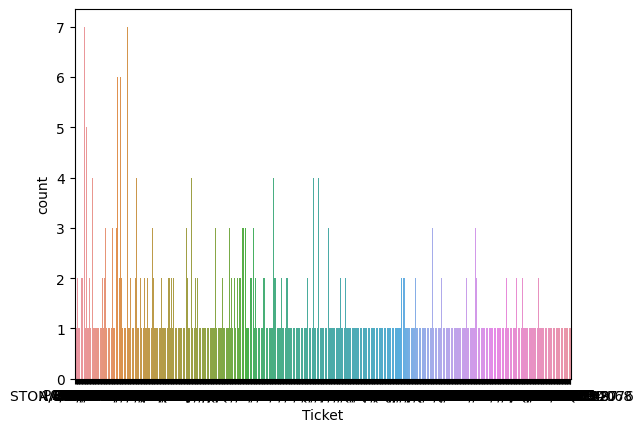

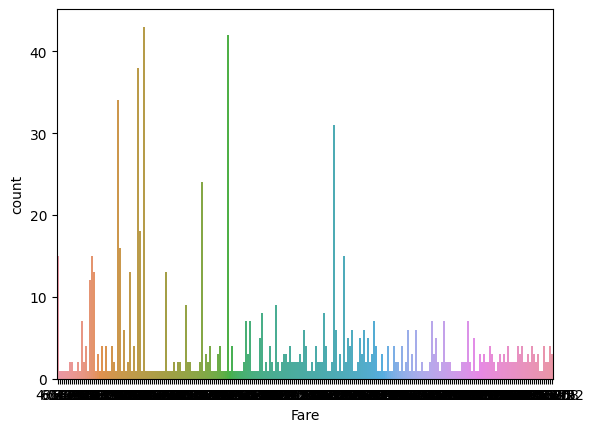

In [4]:
def count_plot(feature):
    sns.countplot(x=feature,data=df)
    plt.show()
    print("\n\n")

    
    
categories=["Survived","Pclass","Sex","Age","Ticket","Fare"]
for x in categories:
    count_plot(x)

<AxesSubplot: ylabel='Frequency'>

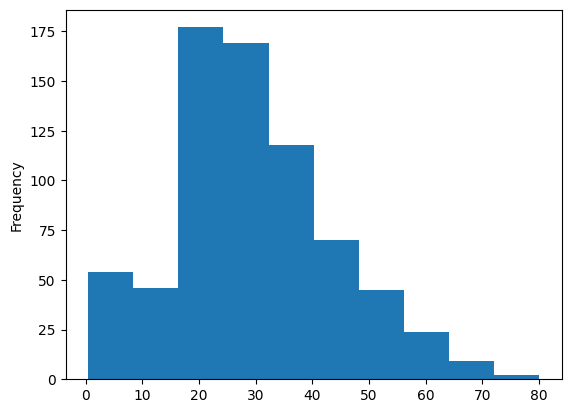

In [5]:
##displaying the age-range of passengers as we see most of the passengers are between 20-40 age
df["Age"].plot.hist()

(array([14., 16., 10.,  4.,  6.,  4.,  8.,  6.,  1.,  2., 12., 17., 13.,
        26., 40., 25., 27., 46., 24., 18., 43., 22., 27., 35., 17., 16.,
        40.,  7., 11., 27.,  8., 13., 14., 14.,  3., 18.,  6., 10., 13.,
         1.,  8.,  7.,  2.,  5.,  6.,  3.,  4.,  4.,  3.,  1.,  0.,  0.,
         3.,  2.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([ 0.42      ,  1.74633333,  3.07266667,  4.399     ,  5.72533333,
         7.05166667,  8.378     ,  9.70433333, 11.03066667, 12.357     ,
        13.68333333, 15.00966667, 16.336     , 17.66233333, 18.98866667,
        20.315     , 21.64133333, 22.96766667, 24.294     , 25.62033333,
        26.94666667, 28.273     , 29.59933333, 30.92566667, 32.252     ,
        33.57833333, 34.90466667, 36.231     , 37.55733333, 38.88366667,
        40.21      , 41.53633333, 42.86266667, 44.189     , 45.51533333,
        46.84166667, 48.168     , 49.49433333, 50.82066667, 52.147     ,
        53.47333333, 54.79966667, 56.126     , 57.45233333, 58.77866667,
 

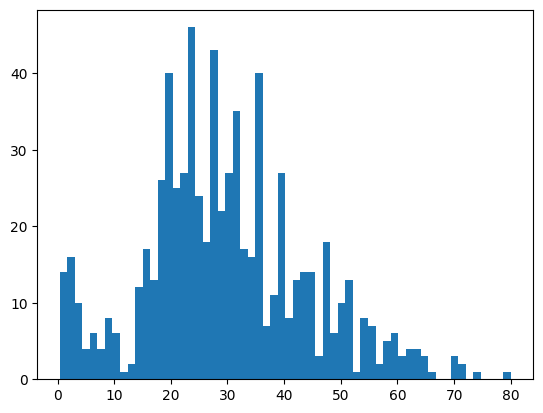

In [6]:
plt.hist(df["Age"],bins=60)

In [7]:
df.groupby("Sex").agg({"Age":"mean","Survived":"sum",})

,Age,Survived
Sex,,
female,27.915709,233
male,30.726645,109


In [8]:
#Mean of Survived persons by Gender
df.groupby("Sex").agg({"Survived":"mean"})

,Survived
Sex,
female,0.742038
male,0.188908


In [9]:
df.groupby("Pclass").agg({"Survived":"mean",
                         "Sex":"count",
                         "Age":"mean"})


,Survived,Sex,Age
Pclass,,,
1,0.629630,216,38.233441
2,0.472826,184,29.877630
3,0.242363,491,25.140620


In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
#now he have to clean our dataset for modeling,
#thats why those features which are not so important 
#for our modeling should be deleted and we did 
df.drop(["Name","Ticket","Cabin","PassengerId"],axis=1,inplace=True)

In [12]:
#Now we are going to delete the rows-columns which has NaN
df.dropna(inplace=True) 

In [13]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [14]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
889,1,1,male,26.0,0,0,30.0000,C


In [15]:
sex=pd.get_dummies(df["Sex"],drop_first=True)
sex.head(30)

,male
0,1
1,0
2,0
3,0
4,1
6,1
7,1
8,0
9,0
10,0


In [16]:
df.Embarked.value_counts()

S    554
C    130
Q     28
Name: Embarked, dtype: int64

In [17]:
embark=pd.get_dummies(df["Embarked"],drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [18]:
pclass=pd.get_dummies(df["Pclass"],drop_first=True)
pclass.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [19]:
df.drop(["Sex","Embarked","Pclass"],inplace=True, axis=1)
df.head()

,Survived,Age,SibSp,Parch,Fare
0,0,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,1,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,0,35.0,0,0,8.0500


In [20]:
#adding get_dummies variables to our dataset

df=pd.concat([df,sex,embark,pclass],axis=1)
df.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [21]:
df.dtypes

Survived      int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
male          uint8
Q             uint8
S             uint8
2             uint8
3             uint8
dtype: object

# MODELLING

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [23]:
#what we want to predict >Survived:1 or not :0 so this is our y-values and all others are X-variables
#the independent variable is survived : 1 or 0
#the other in the table are indendent

X=df.drop("Survived",axis=1)
y=df["Survived"]

In [24]:
#dividing the dataset into test and train and its size
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.3,random_state=42)

In [25]:
#so for our Model we will use Logisticregression 

logreg=LogisticRegression(max_iter=1000, C=0.1)

In [26]:
#We will fit all divided train dataset with its label(y_train)

logreg.fit(X_train,y_train)

C:\Users\Hricha\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


LogisticRegression(C=0.1, max_iter=1000)

In [27]:
#lets test how well our model works on the test-dataset 

logreg.score(X_test,y_test)

C:\Users\Hricha\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.7897196261682243

In [28]:
#score of model on Test and the train
print(logreg.score(X_test,y_test))
print(logreg.score(X_train,y_train))

0.7897196261682243
0.8112449799196787


C:\Users\Hricha\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Hricha\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [29]:
#X_test wasnt seen from our model and we will now predict it and its result is predicted(y_pred)

y_pred=logreg.predict(X_test)

C:\Users\Hricha\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [30]:
#in this step we will compare the y_test label and our predicted label(y_pred) 

confusion_matrix(y_test,y_pred)

array([[108,  14],
       [ 31,  61]], dtype=int64)

In [31]:
from sklearn.metrics import classification_report

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       122
           1       0.81      0.66      0.73        92

    accuracy                           0.79       214
   macro avg       0.80      0.77      0.78       214
weighted avg       0.79      0.79      0.79       214



# OLS

In [33]:
#importing libraries
import os
import math
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
from scipy.stats import randint
from scipy.stats import loguniform
from IPython.display import display


In [34]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, \
f1_score, roc_auc_score, roc_curve, precision_score, recall_score



In [37]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings 
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 50)


In [38]:
df=pd.read_csv("Titanic-Dataset.csv")

In [39]:
df.drop(["PassengerId","Name","Ticket","Cabin"],axis=1,inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [40]:
target = 'Survived'
labels = ['Not-Survived','Survived']
features = [i for i in df.columns.values if i not in [target]]

original_df = df.copy(deep=True)
display(df.head())
print('\n\033[1mInference:\033[0m The Datset consists of {} features & {} samples.'.format(df.shape[1], df.shape[0]))

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S



Inference: The Datset consists of 8 features & 891 samples.


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [42]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [43]:
#Checking number of unique rows in each feature

df.nunique().sort_values()

Survived      2
Sex           2
Pclass        3
Embarked      3
SibSp         7
Parch         7
Age          88
Fare        248
dtype: int64

In [44]:
#Checking number of unique rows in each feature

nu = df[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(df[features].shape[1]):
    if nu.values[i]<=15:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))


Inference: The Datset has 2 numerical & 5 categorical features.


In [45]:
#Checking the stats of all the columns

display(df.describe())

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


            Target Variable Distribution           


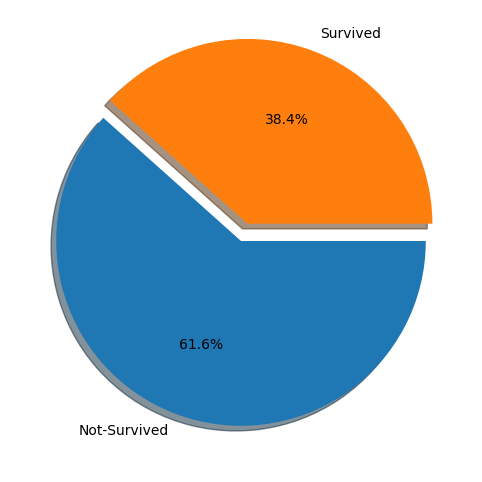

In [46]:
#Let us first analyze the distribution of the target variable

MAP={}
for e, i in enumerate(df[target].unique()):
    MAP[i]=labels[e]
#MAP={0:'Not-Survived',1:'Survived'}
df1 = df.copy()
df1[target]=df1[target].map(MAP)
explode=np.zeros(len(labels))
explode[-1]=0.1
print('\033[1mTarget Variable Distribution'.center(55))
plt.pie(df1[target].value_counts(), labels=df1[target].value_counts().index, counterclock=False, shadow=True, 
        explode=explode, autopct='%1.1f%%', radius=1, startangle=0)
plt.show()

Inference: The Target Variable seems to be slightly imbalanced! Hence we shall try to perform data augmentation.

                                     Features Distribution                                      


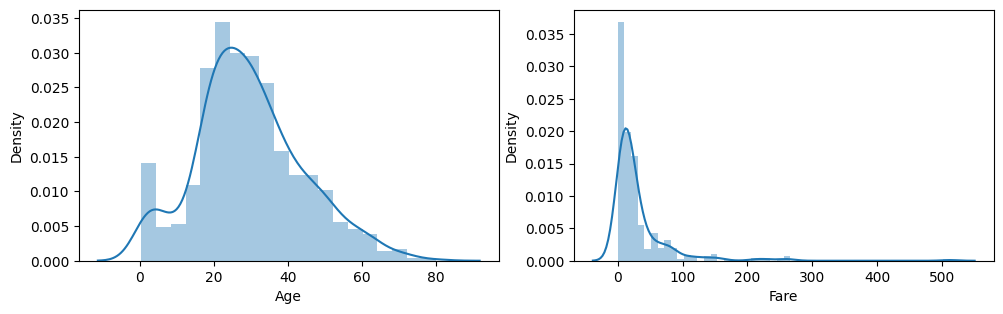

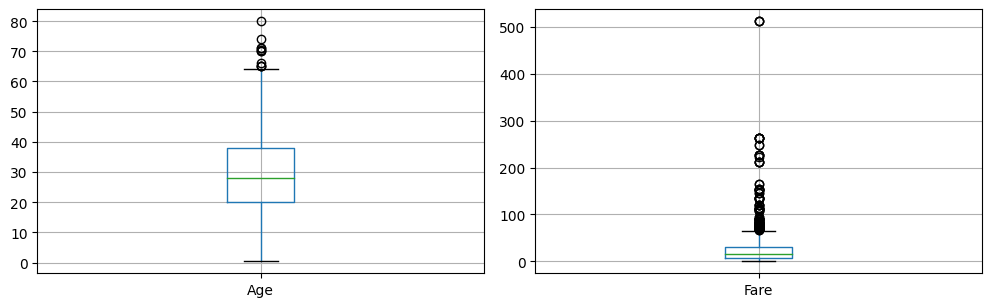

In [47]:

#Understanding the feature set

print('\033[1mFeatures Distribution'.center(100))

nf = [i for i in features if i not in cf]

plt.figure(figsize=[15,3*math.ceil(len(features)/3)])
for c in range(len(nf)):
    plt.subplot(math.ceil(len(features)/3),3,c+1)
    sns.distplot(df[nf[c]])
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,3*math.ceil(len(features)/3)])
for c in range(len(nf)):
    plt.subplot(math.ceil(len(features)/3),3,c+1)
    df.boxplot(nf[c])
plt.tight_layout()
plt.show()

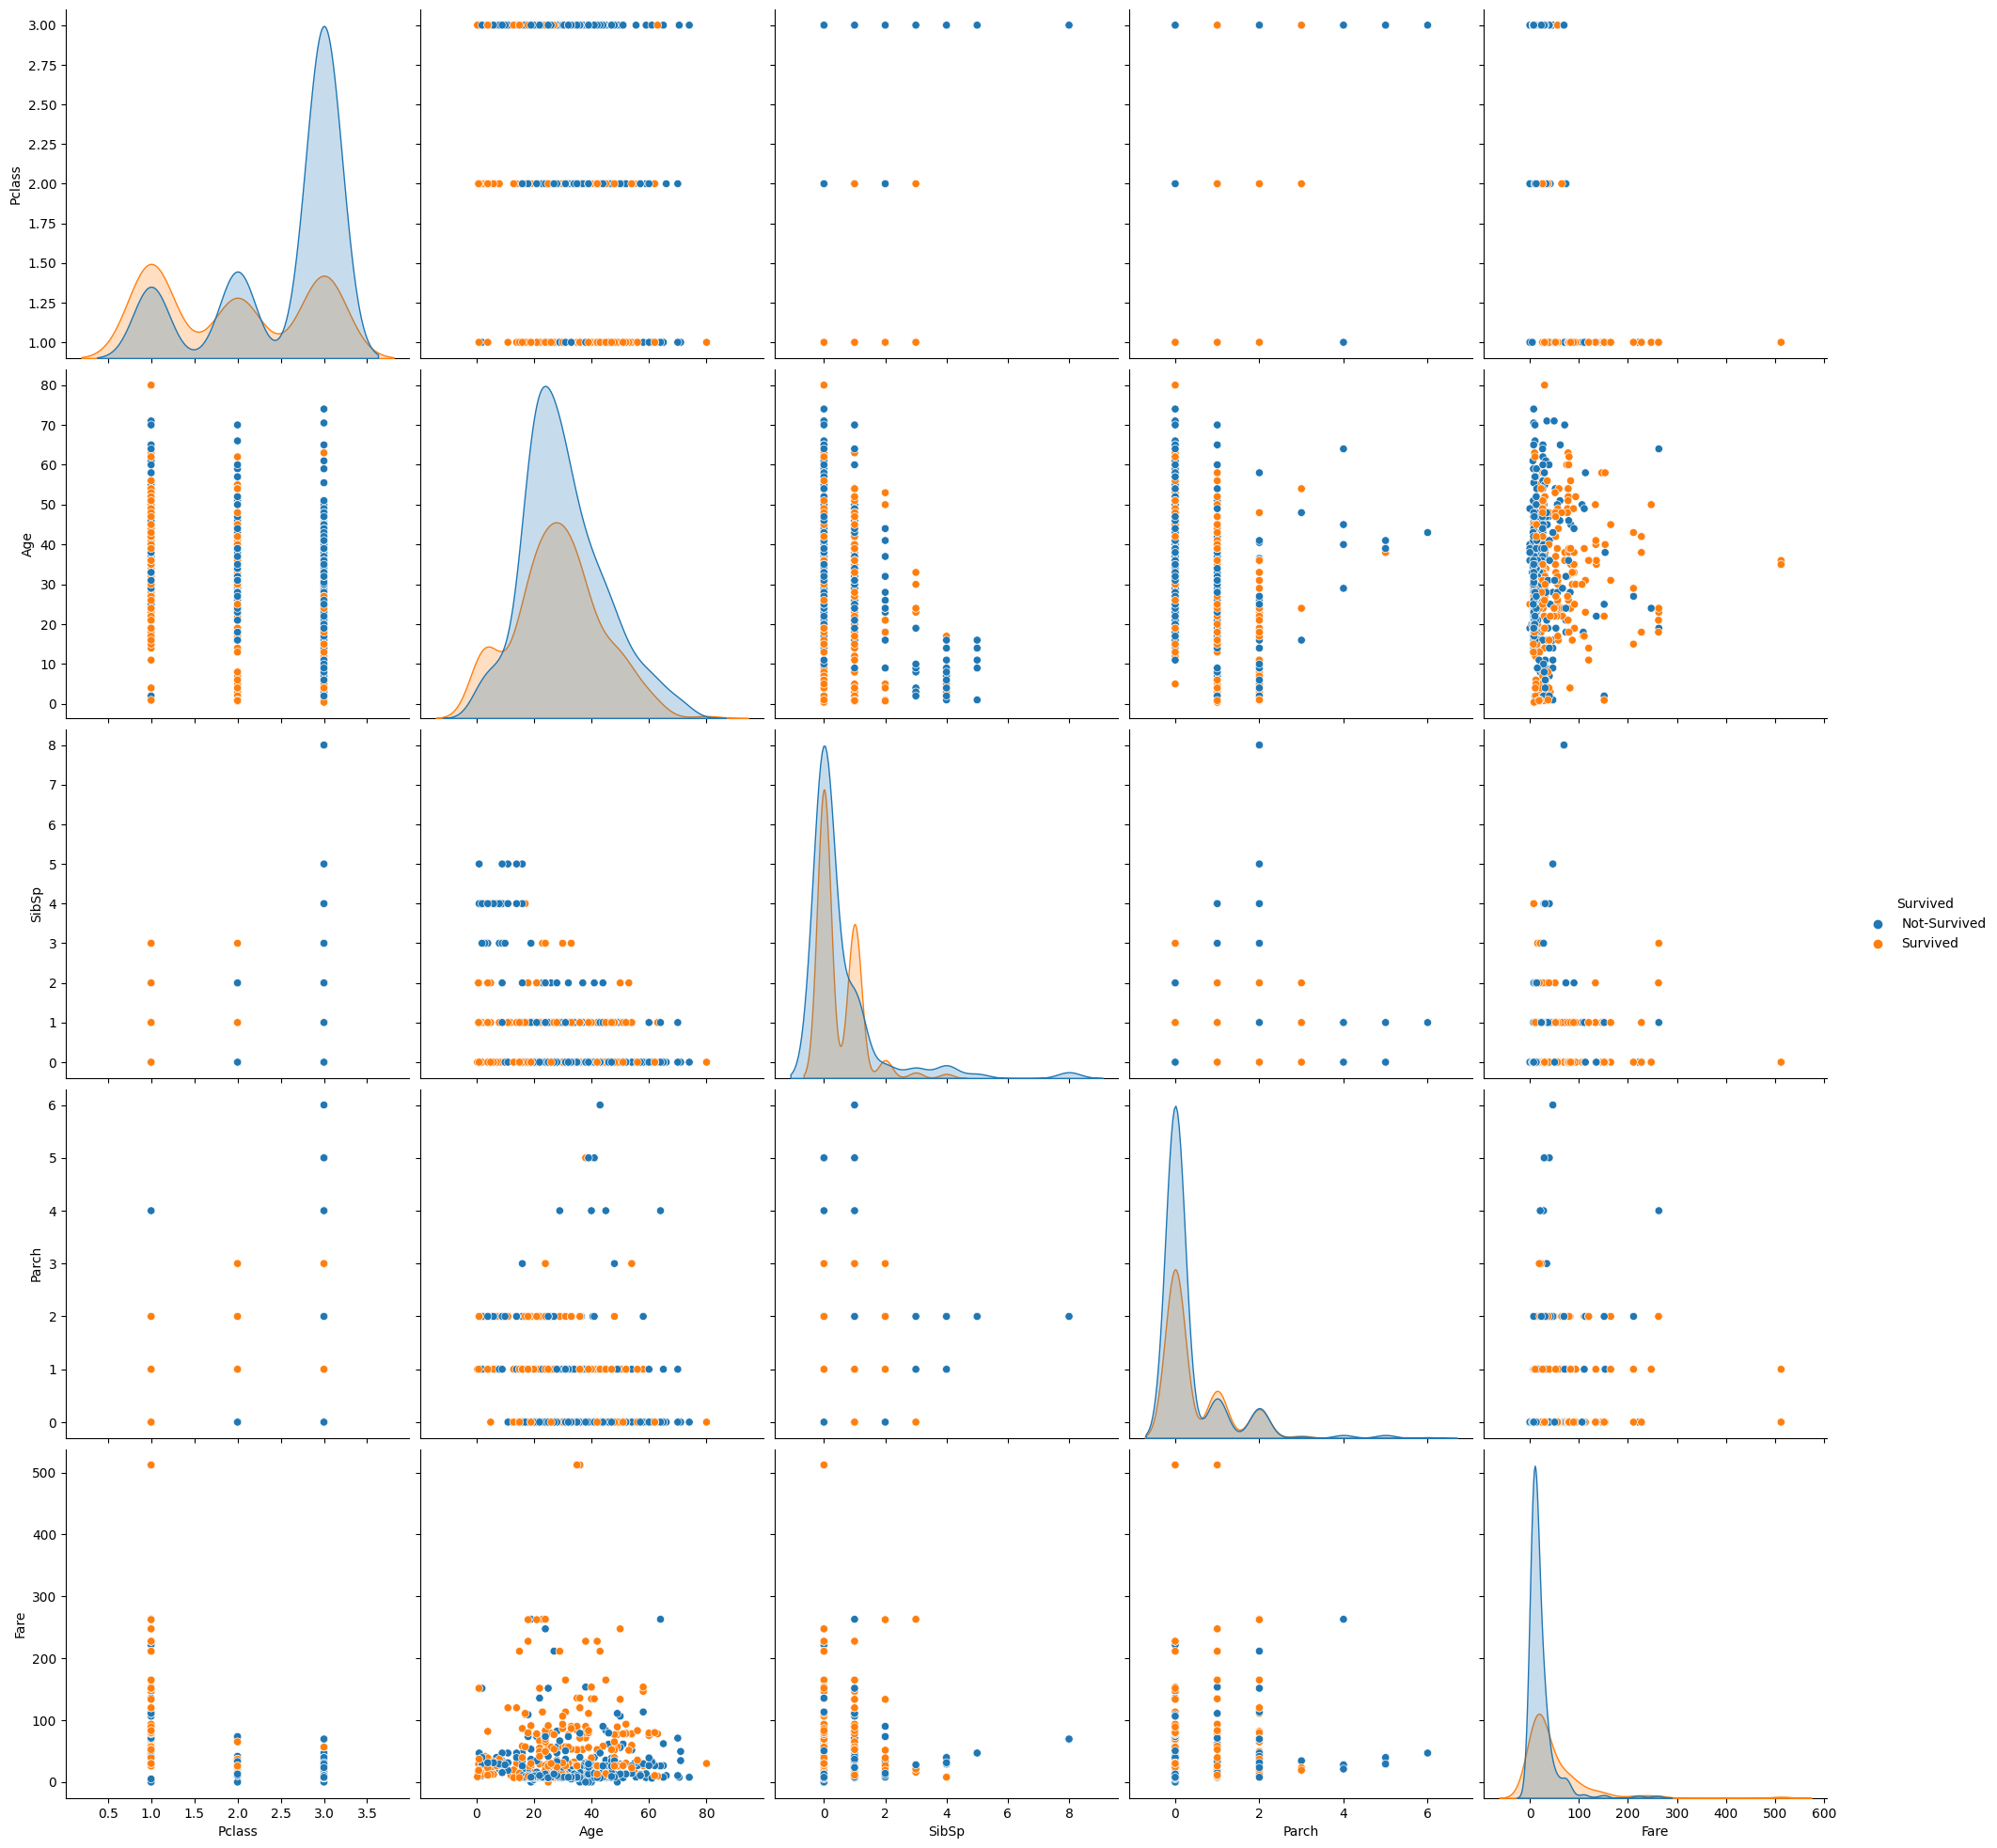

In [48]:
#Understanding the relationship between all the features

g=sns.pairplot(df1, hue=target, size=4)
#g.map_upper(sns.kdeplot, levels=1, color=".2")
plt.show()

Inference: The data samples of most of the features do show some patterns. Also they seem to have lot of overlap for the outcome classes, making it difficult to be distingusihable. Let is proceed to perform cleanup on the data to remove the irregularities...



# OLS

In [49]:
import pandas as pd
import statsmodels.api as sm

##load dataset
titanic=pd.read_csv('Titanic-Dataset.csv')
titanic


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [50]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [51]:
titanic.drop(columns=['Cabin'],axis=0,inplace=True)

In [52]:
titanic['Age'].fillna(titanic['Age'].mean(),inplace=True)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [53]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [54]:
sex=pd.get_dummies(titanic['Sex'],drop_first=True)

In [55]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [56]:
titanic=pd.concat([titanic,sex],axis=1)

In [57]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


In [58]:
titanic.drop(["PassengerId","Sex","Pclass","Embarked","Name","Ticket"],axis=1,inplace=True)

In [59]:
titanic

,Survived,Age,SibSp,Parch,Fare,male
0,0,22.000000,1,0,7.2500,1
1,1,38.000000,1,0,71.2833,0
2,1,26.000000,0,0,7.9250,0
3,1,35.000000,1,0,53.1000,0
4,0,35.000000,0,0,8.0500,1
...,...,...,...,...,...,...
886,0,27.000000,0,0,13.0000,1
887,1,19.000000,0,0,30.0000,0
888,0,29.699118,1,2,23.4500,0
889,1,26.000000,0,0,30.0000,1


In [60]:
x = titanic.drop(["Survived","Parch","male","Fare"],axis=1)
y = titanic["Fare"]

In [61]:
x

,Age,SibSp
0,22.000000,1
1,38.000000,1
2,26.000000,0
3,35.000000,1
4,35.000000,0
...,...,...
886,27.000000,0
887,19.000000,0
888,29.699118,1
889,26.000000,0


In [62]:
y

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [63]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [64]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_train, y_train)


LinearRegression()

In [65]:
y_pred = regressor.predict(x_test)


In [66]:
print(y_pred)

[27.76024394 27.76024394 46.82701396 35.47237621 27.39737364 27.76024394
 33.10681802 28.43545444 33.03334432 27.76024394 33.55238472 33.10681802
 27.76024394 15.97848489 24.80217165 19.61176768 24.28313126 29.91910193
 30.51161603 12.56319908 21.68792927 23.76409086 27.76024394 27.76024394
 23.76409086 40.81895028 28.95449484 23.76409086 25.32121205 36.51967971
 29.47353523 38.29722199 26.87833324 27.76024394 35.10950591 28.95449484
 34.66393921 26.87833324 25.32121205 40.37338359 51.19975824 25.32121205
 27.76024394 50.46029675 38.2237483  27.76024394 27.76024394 37.1121938
 32.58777762 47.04743506 27.76024394 24.28313126 22.13349597 22.20696967
 27.76024394 40.22643619 44.52570677 48.90317555 40.67200289 43.18450848
 23.76409086 27.39737364 48.08551585 27.76024394 26.35929285 28.95449484
 37.7781816  26.87833324 21.09541517 22.20696967 32.51430392 44.97127347
 34.59046551 27.76024394 25.06169185 51.05281084 45.34336647 33.10681802
 29.99257563 27.76024394 35.47237621 24.72869796 33.

In [67]:
len(y_pred)

179

In [68]:
from sklearn.metrics import mean_squared_error, r2_score

print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))


Mean squared error: 2157.90
Coefficient of determination: 0.06


 The closer the mean squared error is to zero and the closer the coefficient of determination is to 1, the better the model is performing.


# Two stage LS 

In [102]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
titanic=pd.read_csv("Titanic-Dataset.csv")


In [103]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [104]:
titanic['Age'].fillna(titanic['Age'].mean(),inplace=True)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [105]:
titanic.drop(["Cabin"],axis=1,inplace=True)

In [106]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [109]:
def fill_na_embarked(titanic, Embarked):
    
    return titanic["Embarked"].fillna('S')
    
titanic['Embarked'] = fill_na_embarked(titanic,'Embarked')

In [117]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [141]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Sex_male'],
      dtype='object')

In [143]:
# Select relevant features
titanic.drop(["PassengerId","Name","SibSp","Parch","Ticket","Embarked"] ,axis=1,inplace=True)
titanic


,Survived,Pclass,Age,Fare,Sex_male
0,0,3,22.000000,7.2500,1
1,1,1,38.000000,71.2833,0
2,1,3,26.000000,7.9250,0
3,1,1,35.000000,53.1000,0
4,0,3,35.000000,8.0500,1
...,...,...,...,...,...
886,0,2,27.000000,13.0000,1
887,1,1,19.000000,30.0000,0
888,0,3,29.699118,23.4500,0
889,1,1,26.000000,30.0000,1


In [144]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(titanic.drop('Survived', axis=1), titanic['Survived'], test_size=0.2, random_state=42)


Fit the first stage: Fit a regression model to predict the endogenous variable (in this case, Fare) using the exogenous variables (all other features except for Survived).

In [145]:
from sklearn.linear_model import LinearRegression

# Fit the first stage regression
stage_one = LinearRegression().fit(X_train.drop('Fare', axis=1), X_train['Fare'])


In [146]:
# Predict the endogenous variable
X_train['Fare_predicted'] = stage_one.predict(X_train.drop('Fare', axis=1))
X_test['Fare_predicted'] = stage_one.predict(X_test.drop('Fare', axis=1))


In [147]:
X_train = X_train[['Pclass', 'Age', 'Sex_male', 'Fare_predicted']]
X_test = X_test[['Pclass', 'Age', 'Sex_male', 'Fare_predicted']]


In [148]:
from sklearn.linear_model import LogisticRegression

# Fit the second stage logistic regression
stage_two = LogisticRegression().fit(X_train, y_train)


Evaluate the model: Evaluate the performance of the model by predicting the survival outcome for the testing set and comparing the predictions to the actual values.

In [153]:
# Predict the survival outcome for the testing set
y_pred = stage_two.predict(X_test)
print(y_pred)



[0 0 0 1 1 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 1 1 1]


In [154]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy score
accuracy_score(y_test, y_pred)


0.8100558659217877